# COGS 118B: Unsupervised Machine Learning Algorithms

## Bayesian Sequential Estimation and the Effect of Priors

In this assignment, I was given questions about exploring the effect of priors on bayesian sequential estimations. Below you will see my demonstrated exploration on the topic, a long with commentary on the results I recieved.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import beta
%matplotlib inline

In [2]:
def plotbetapdfs(ab, sp_idx, tally):
    # ab is a 3-by-2 matrix containing the a,b parameters for the
    # priors/posteriors
    # Before the first flip: ab = [[1, 1], [0.5, 0.5], [50, 50]]
    #
    # sp_idx is a 3-tuple that specfies in which subplot to plot the current
    # distributions specified by the (a,b) pairs in ab.
    # 
    # tally is a 2-tuple (# heads, # tails) containing a running count of the
    # observed number of heads and tails.
    # Before the first flip: tally=(0,0)

    num_rows = np.shape(ab)[0]
    mark = ['b-','r:','g--'];

    if 'axes' not in globals():
        global fig
        global axes
        fig, axes = plt.subplots(sp_idx[0], sp_idx[1])
        fig.set_figheight(10)
        fig.set_figwidth(10)
    elif np.shape(axes)[0] != sp_idx[:2][0] or np.shape(axes)[1] != sp_idx[:2][1]:
        print(sp_idx[:2])
        print(list(np.shape(axes)))
        fig, axes = plt.subplots(sp_idx[0], sp_idx[1])
        fig.set_figheight(10)
        fig.set_figwidth(10)

    for row in range(num_rows):
        a = ab[row][0]
        b = ab[row][1]
        
        x = np.linspace(0.001, 0.999, num=999)
        y = beta.pdf(x, a, b)
        norm_y = y / max(y)
        
        marker = mark[row]
        ax = axes[sp_idx[2]//sp_idx[1], sp_idx[2]%sp_idx[1]]

        ax.plot(x, norm_y, mark[row], lw=2)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1.2])
        ax.set_title(str(tally[0])+' h, '+str(tally[1])+' t')
        ax.set_xlabel('Bias weighting for heads $\mu$')
        ax.set_ylabel('$p(\mu|\{data\},I)$')
    
    fig.tight_layout()
    plt.close()
    return fig

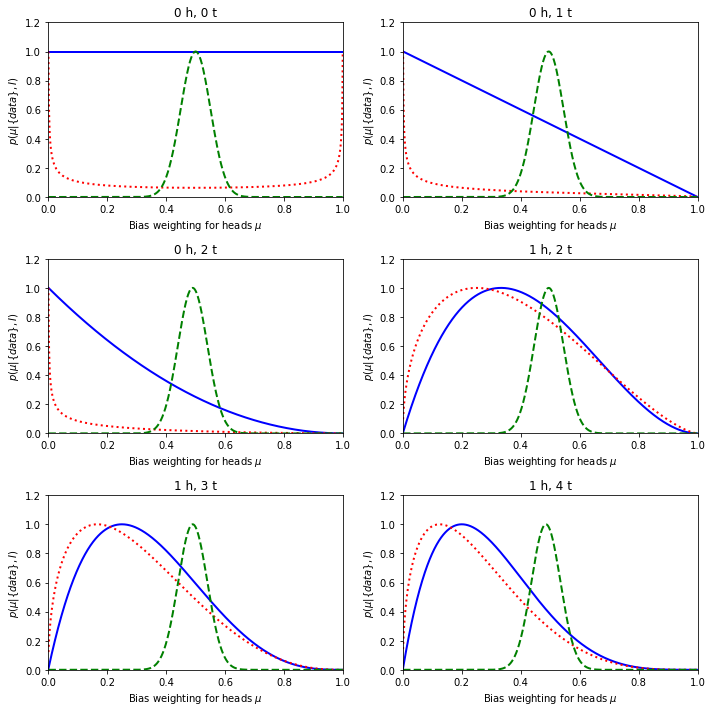

In [3]:
#Five Coin Flips
h, t = 0, 0
tally  = (h,t)
mu = 0.25

priorab = [[1, 1], [0.5, 0.5], [50, 50]]


for i in range(5):
    
    res = np.random.binomial(1, mu)
    h += res
    t += (1-res)
    for r in range(3):
        priorab[r][0] += res
        priorab[r][1] += (1-res)
    tally  = (h,t)
    
    plotbetapdfs(priorab, (3,2,i+1),tally)
#    print(h,t, priorab)


In the 5 coin flips, the initial priors get updated when becoming the posteriors, that then become the priors for the next flip. What sets apart the beta(a=50, b=50) from the other two priors, is that the parameter distribution does not change as dramatically–it is not as affected by the updated priors through every coin flip. This is most likely due to the higher value number in general (as 1 head flip, is a larger percentage out of a prior a=1 (it increases by 100% if a head is flipped where a would now equal 2) versus a prior a=50 (where 1 head flip would make a be updated to equal 51, where it has increased by around 1 or 2%). 

As far as 'fake' data goes for priors, if we create fake data in high numbers (like beta(a=50, b=50)), 'real' data like observed coin flips after the prior, doesn't influence the initial 'fake' data, and we won't get as accurate of parameter distribution in a smaller number of trials or coin flips. Where beta(a=1, b=1) we start to see a change in the posterior parameter distribution with as little as one coin flip, that is more accurate than the previous. By not assuming large quantity of 'fake' data in the posterior, we are able to observe a more accurate parameter distribution.

(4, 3)
[3, 2]


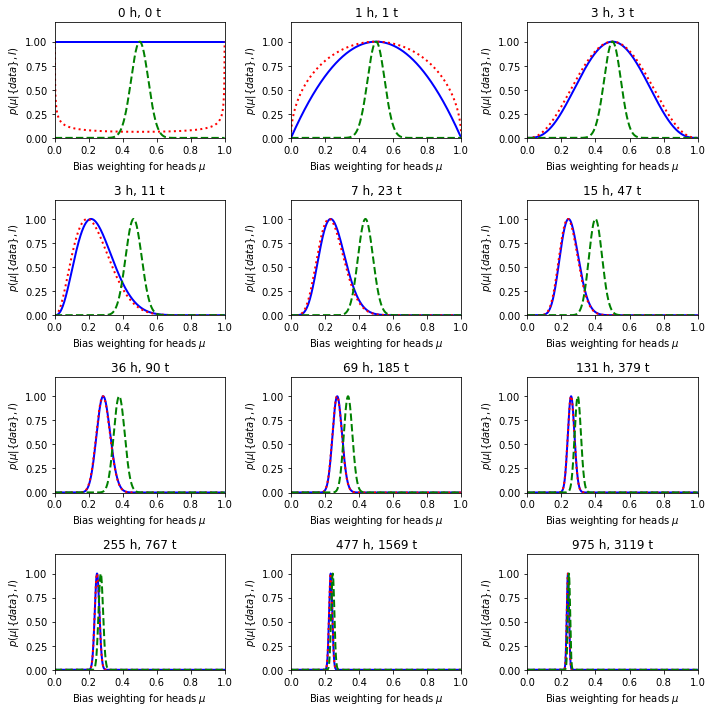

In [4]:
#2048 Coin Flips
h, t = 0, 0
tally  = (h,t)
mu = 0.25

priorab = [[1, 1], [0.5, 0.5], [50, 50]]


plotbetapdfs(priorab, (4,3,0), tally)

for i in range(1,12):
    
    res = np.random.binomial(2**i, mu)
    h += res
    t += (2**i-res)
    for r in range(3):
        priorab[r][0] += res
        priorab[r][1] += (2**i-res)
    tally  = (h,t)
    
    plotbetapdfs(priorab, (4,3,i),tally)




The posterior parameter distributions after several thousands of flips show that they do end up merging very close together regardless of the initial beta prior. I believe this is due to the fact that the amount of flips and 'true' observations of the coin flips, greatly outweigh the priors. The largest value prior beta we had was beta(a=50, b=50), and in the same way as I answered earlier, 2000+ coin flips differ greatly than the origion prior of 50, giving a greater influence to ditributing over a true-er posterior ditribution.